In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thanishas","key":"f2b28eef255137696e58b3f99be4e11d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade kaggle


In [ ]:
!kaggle datasets download -d virajtamakuwala/dogs-vs-cats-redux

Dataset URL: https://www.kaggle.com/datasets/virajtamakuwala/dogs-vs-cats-redux
License(s): unknown
 99% 809M/817M [00:13<00:00, 37.6MB/s]
100% 817M/817M [00:13<00:00, 65.4MB/s]


In [ ]:
!unzip /content/dogs-vs-cats-redux.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
img_width=128
img_height=128
img_size=(128,128)
img_channels=3

In [ ]:
Directory = os.listdir('/content/train/train')

# Directory = r'C:\Users\KRISHNA\CatsDogData\train\train'

labels=[]
for name in Directory:
    label =name.split('.')[0]
    if label=='dog':
        labels.append(1)
    else:
        labels.append(0)

df=pd.DataFrame({
    'filename':Directory,
    'label':labels
})

In [ ]:
df.head()

filename  label
0  cat.3064.jpg      0
1  cat.3688.jpg      0
2  dog.4892.jpg      1
3  cat.7573.jpg      0
4  dog.8655.jpg      1

In [ ]:
image_dir = "/content/train/train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

filename label
0  cat.3064.jpg   cat
1  cat.3688.jpg   cat
2  dog.4892.jpg   dog
3  cat.7573.jpg   cat
4  dog.8655.jpg   dog

In [ ]:
labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

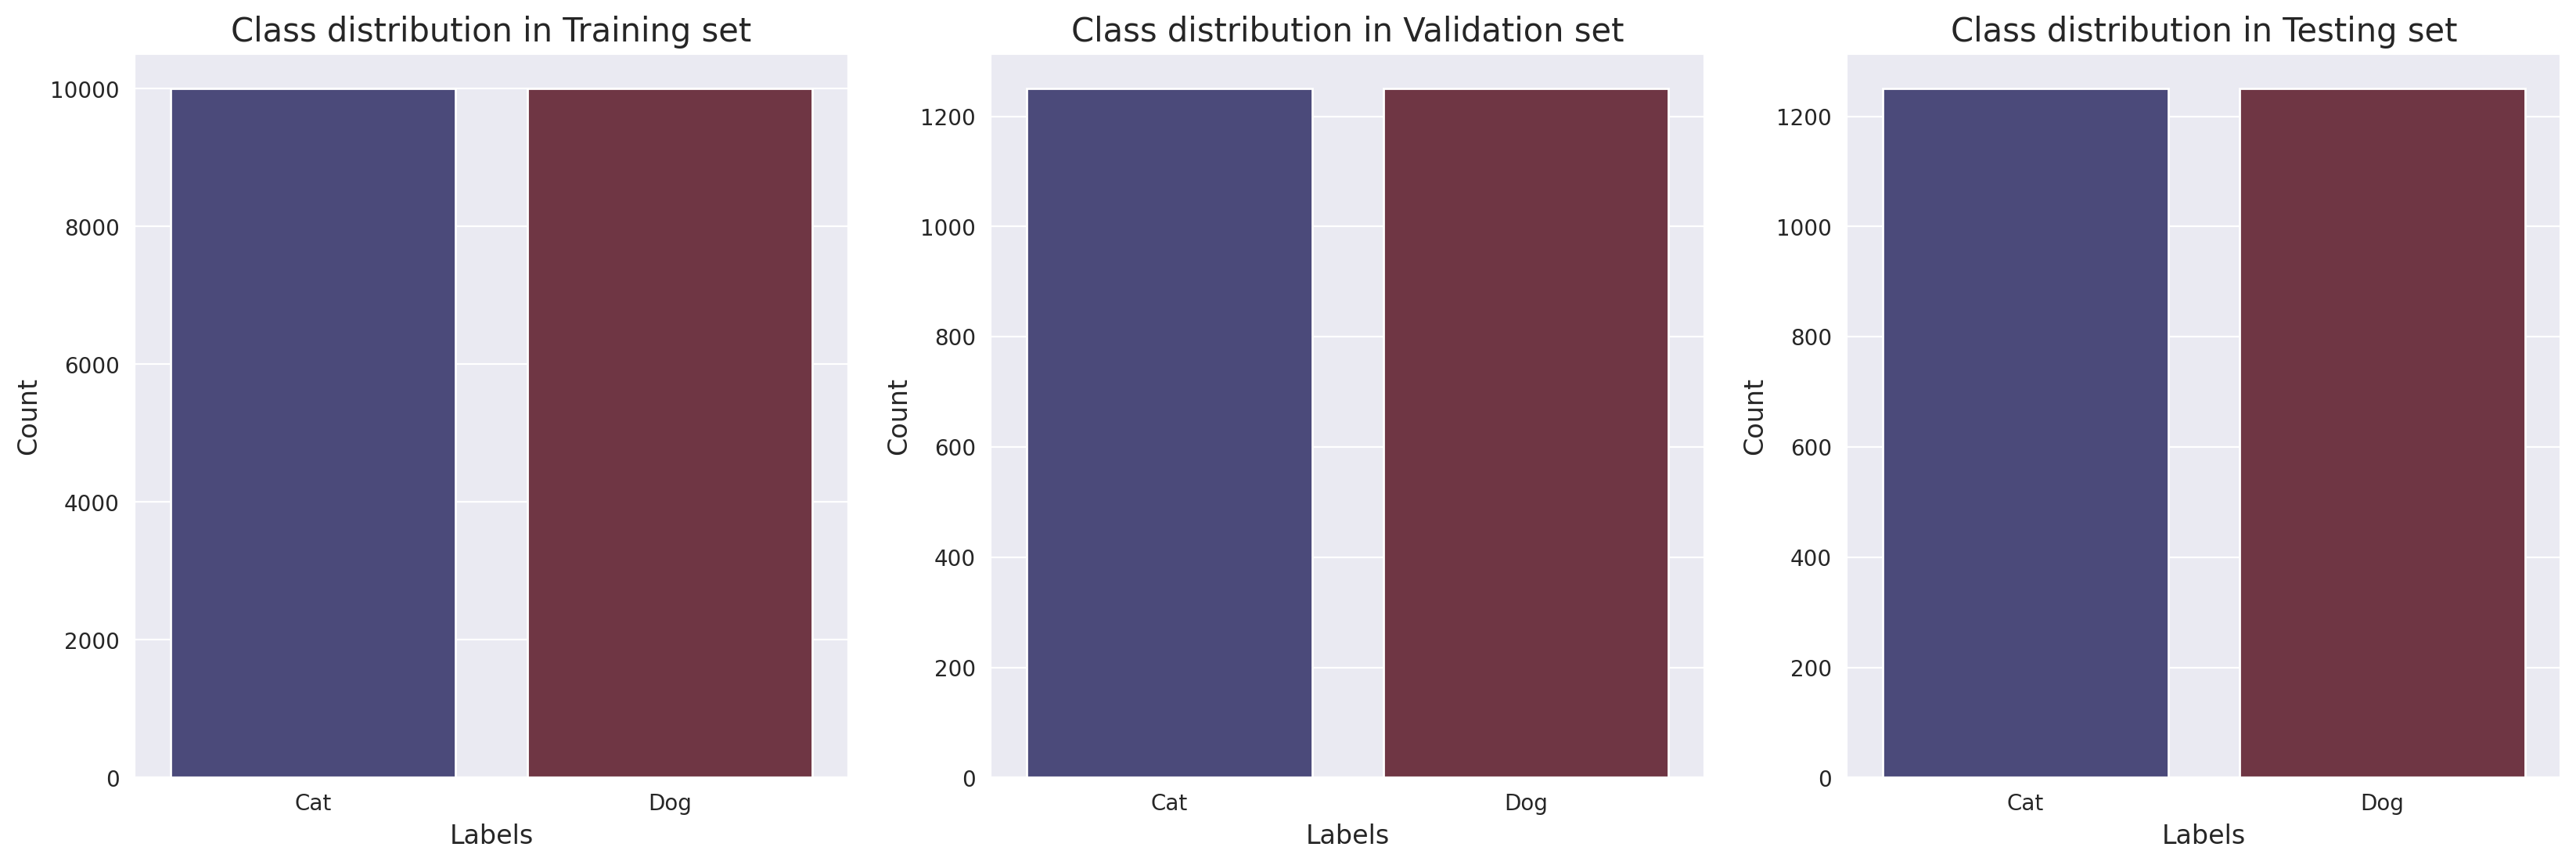

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_val, and X_test are defined and have a 'label' column
labels = ['Cat', 'Dog']

label1, count1 = np.unique(X_train.label, return_counts=True)
label2, count2 = np.unique(X_val.label, return_counts=True)
label3, count3 = np.unique(X_test.label, return_counts=True)

uni1 = pd.DataFrame(data=count1, index=labels, columns=['Count1'])
uni2 = pd.DataFrame(data=count2, index=labels, columns=['Count2'])
uni3 = pd.DataFrame(data=count3, index=labels, columns=['Count3'])

plt.figure(figsize=(20, 6), dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1, x=uni1.index, y='Count1', hue=uni1.index, palette='icefire', dodge=False).set_title('Class distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend

plt.subplot(132)
sns.barplot(data=uni2, x=uni2.index, y='Count2', hue=uni2.index, palette='icefire', dodge=False).set_title('Class distribution in Validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend

plt.subplot(133)
sns.barplot(data=uni3, x=uni3.index, y='Count3', hue=uni3.index, palette='icefire', dodge=False).set_title('Class distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend([],[], frameon=False)  # Remove legend

plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["label"] = df["label"].replace({0: 'cat', 1: 'dog'})
train_data, validation_data = train_test_split(df, test_size=0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)

final_train_data = train_data.shape[0]
final_validation_data = validation_data.shape[0]
batch_size=15

In [ ]:
generate_train_data = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_gen = generate_train_data.flow_from_dataframe(train_data,
                                             "/content/train/train",x_col='filename',y_col='label',
                                                 target_size=img_size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
generate_validation_data = ImageDataGenerator(rescale=1./255)
validation_gen = generate_validation_data.flow_from_dataframe(
    validation_data,
    "/content/train/train",
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [ ]:
epochs=5
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=validation_gen,
    validation_steps=final_validation_data//batch_size,
    steps_per_epoch=final_train_data//batch_size,
    callbacks=callbacks
)

Epoch 1/5
1333/1333 [==============================] - ETA: 0s - loss: 0.7654 - accuracy: 0.6190

1333/1333 [==============================] - 154s 110ms/step - loss: 0.7654 - accuracy: 0.6190 - val_loss: 0.7262 - val_accuracy: 0.6468 - lr: 0.0010
Epoch 2/5
1333/1333 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.7117

1333/1333 [==============================] - 146s 110ms/step - loss: 0.5698 - accuracy: 0.7117 - val_loss: 0.5064 - val_accuracy: 0.7477 - lr: 0.0010
Epoch 3/5
1333/1333 [==============================] - ETA: 0s - loss: 0.4994 - accuracy: 0.7621

1333/1333 [==============================] - 145s 108ms/step - loss: 0.4994 - accuracy: 0.7621 - val_loss: 0.7496 - val_accuracy: 0.7211 - lr: 0.0010
Epoch 4/5
1333/1333 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.7830

1333/1333 [==============================] - 143s 107ms/step - loss: 0.4657 - accuracy: 0.7830 - val_loss: 1.0748 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 5/5
1333/1333 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.8001

1333/1333 [==============================] - 145s 109ms/step - loss: 0.4376 - accuracy: 0.8001 - val_loss: 1.0326 - val_accuracy: 0.5538 - lr: 0.0010


In [ ]:
image_size = 128
image_channel = 3
bat_size = 32

In [ ]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = '/content/train/train',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = '/content/train/train',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = '/content/train/train',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 61, 61, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/30
625/625 [==============================] - 135s 208ms/step - loss: 0.6438 - accuracy: 0.6734 - val_loss: 0.6379 - val_accuracy: 0.6824 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 130s 209ms/step - loss: 0.5177 - accuracy: 0.7480 - val_loss: 0.9213 - val_accuracy: 0.6484 - lr: 0.0010
Epoch 3/30
103/625 [===>..........................] - ETA: 1:44 - loss: 0.4667 - accuracy: 0.7806

KeyboardInterrupt: 

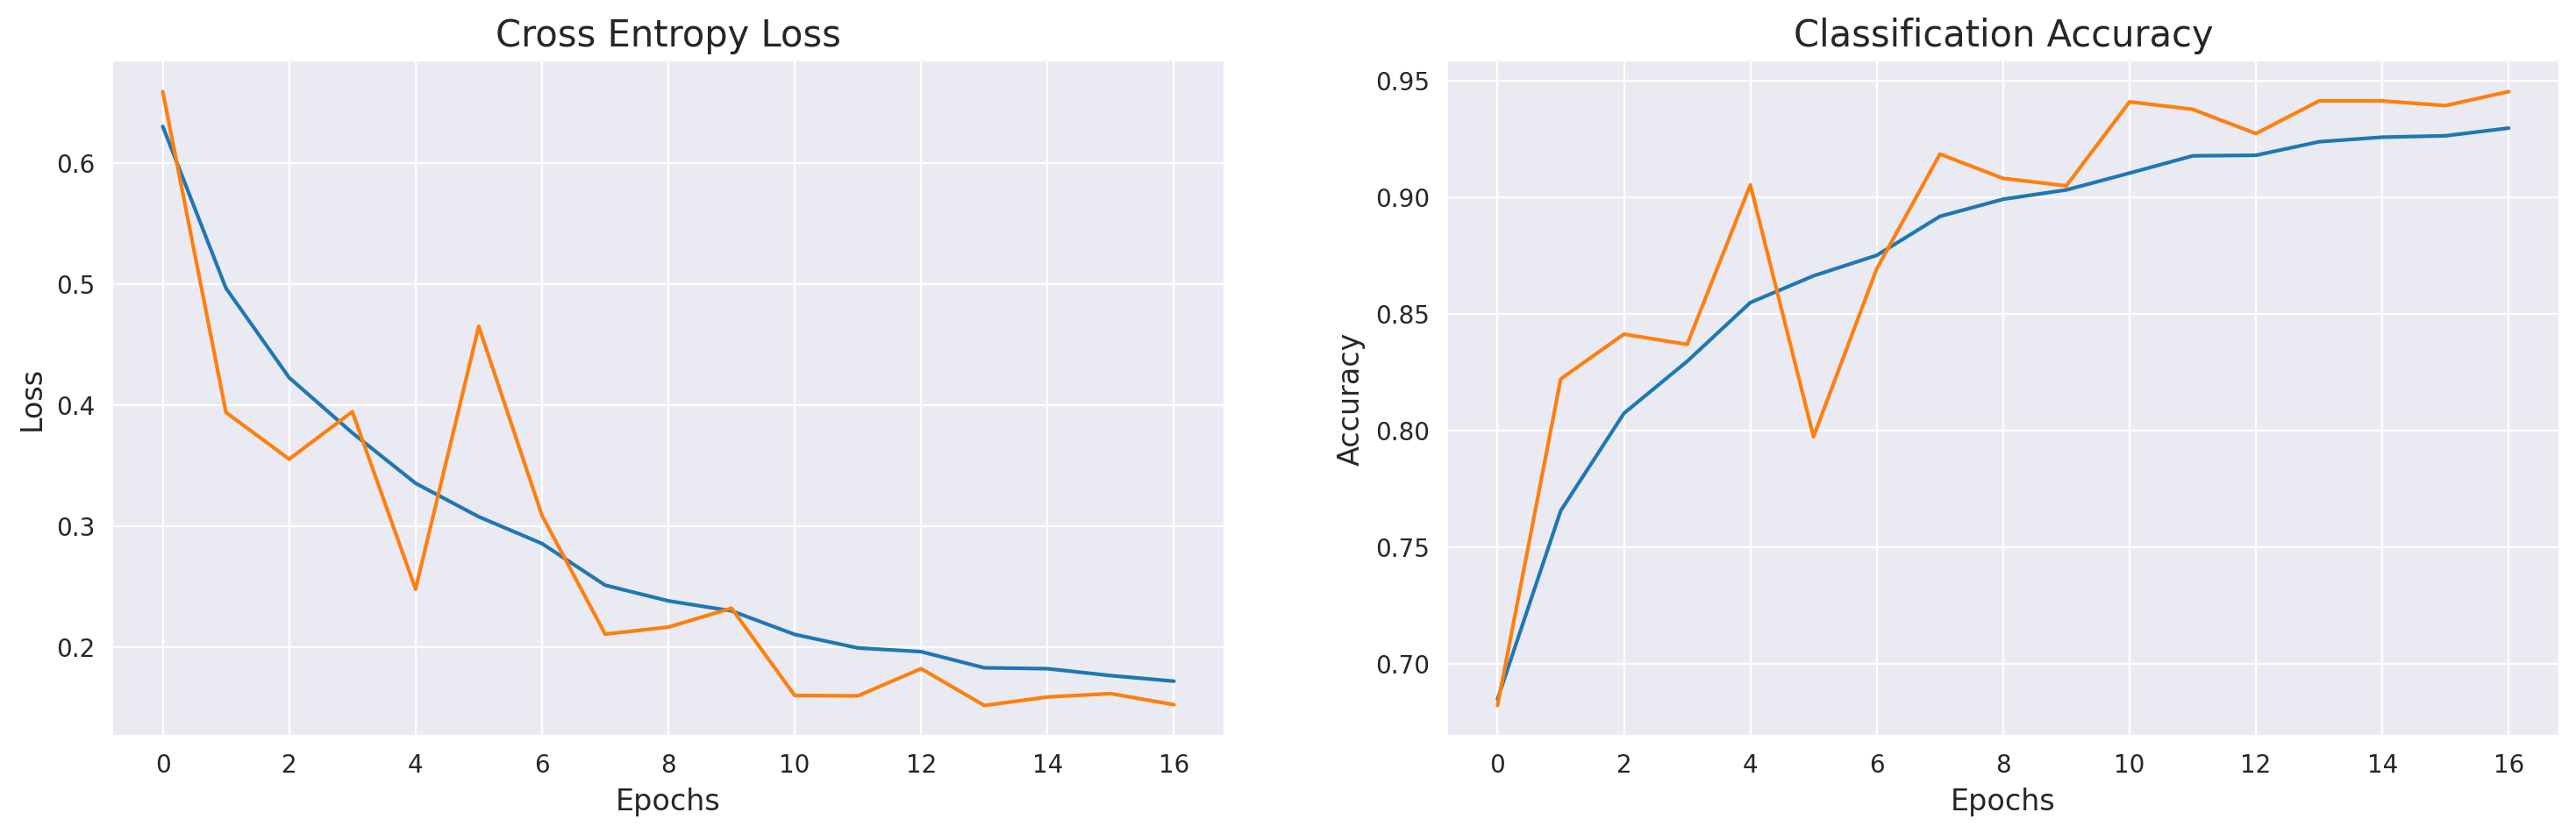

In [ ]:
error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()


In [ ]:

# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 94.45000290870667
The Loss of the model for training data is: 0.13786713778972626
The accuracy of the model for validation data is: 94.12000179290771
The Loss of the model for validation data is: 0.15192200243473053


In [ ]:


model.save("model2_catsVSdogs_10epoch_weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_filenames = os.listdir("/content/test/test")
test_data = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_data.shape[0]

In [ ]:
generate_test_data= ImageDataGenerator(rescale=1./255)
test_gen = generate_test_data.flow_from_dataframe(
    test_data,
    "/content/test/test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [ ]:
prediction = model.predict(test_gen, steps=np.ceil(nb_samples/batch_size))
test_data['label'] = np.argmax(prediction, axis=-1)

label_map = dict((v,k) for k,v in train_gen.class_indices.items())
test_data['label'] = test_data['label'].replace(label_map)

test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })

834/834 [==============================] - 20s 24ms/step


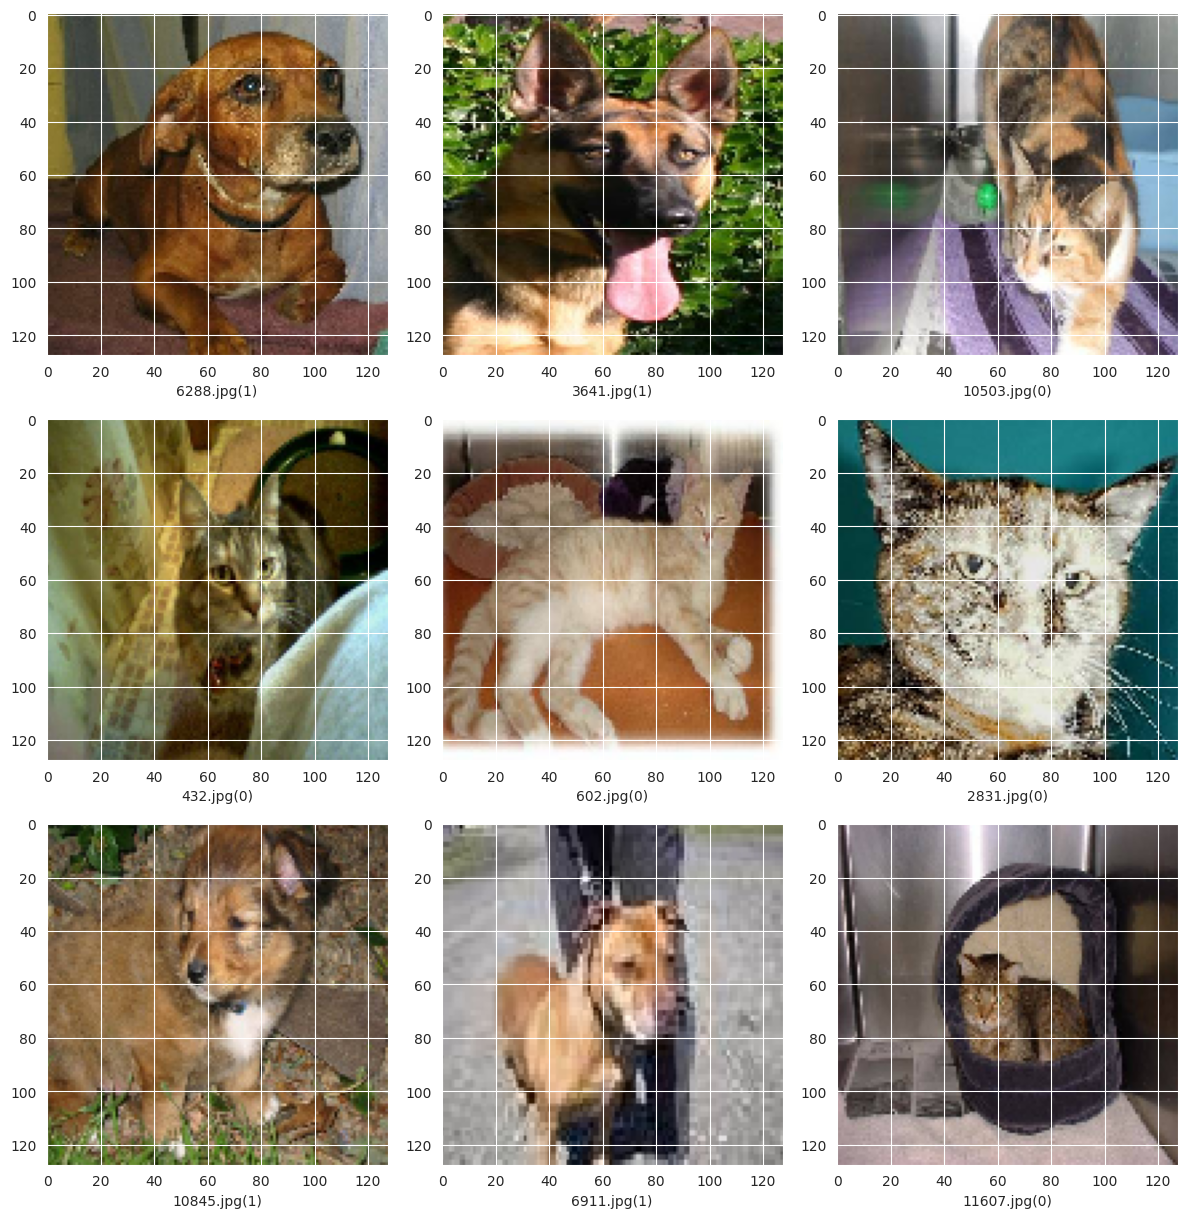

In [ ]:
testing = test_data.head(9)
testing.head()
plt.figure(figsize=(12, 24))
for index, row in testing.iterrows():
    filename = row['filename']
    label = row['label']
    image = load_img("/content/test/test/"+filename, target_size=img_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(image)
    plt.xlabel(filename + '(' + "{}".format(label) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import numpy as np

# Define the results dictionary
results = {0: 'cat', 1: 'dog'}

# Load and preprocess the image
im = Image.open("/content/test/test/10080.jpg")
im = im.resize(img_size)
im = np.expand_dims(im, axis=0)
im = np.array(im)
im = im / 255.0

# Predict the class
pred = model.predict([im])
pred_class = np.argmax(pred, axis=1)[0]

# Print the result
print(pred_class, results[pred_class])


1/1 [==============================] - 1s 515ms/step
1 dog


In [ ]:
from PIL import Image
import numpy as np

# Define the results dictionary
results = {0: 'cat', 1: 'dog'}

# Load and preprocess the image
im = Image.open("/content/test/test/10003.jpg")
im = im.resize(img_size)
im = np.expand_dims(im, axis=0)
im = np.array(im)
im = im / 255.0

# Predict the class
pred = model.predict([im])
pred_class = np.argmax(pred, axis=1)[0]

# Print the result
print(pred_class, results[pred_class])


1/1 [==============================] - 0s 17ms/step
1 dog


In [ ]:
from PIL import Image
import numpy as np

# Define the results dictionary
results = {0: 'cat', 1: 'dog'}

# Load and preprocess the image
im = Image.open("/content/test/test/10016.jpg")
im = im.resize(img_size)
im = np.expand_dims(im, axis=0)
im = np.array(im)
im = im / 255.0

# Predict the class
pred = model.predict([im])
pred_class = np.argmax(pred, axis=1)[0]

# Print the result
print(pred_class, results[pred_class])


1/1 [==============================] - 0s 18ms/step
0 cat


In [ ]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 94.40000057220459
The Loss of the model for testing data is: 0.14377084374427795


In [ ]:
from sklearn.metrics import classification_report
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.93      0.96      0.94      1250
         Dog       0.96      0.93      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



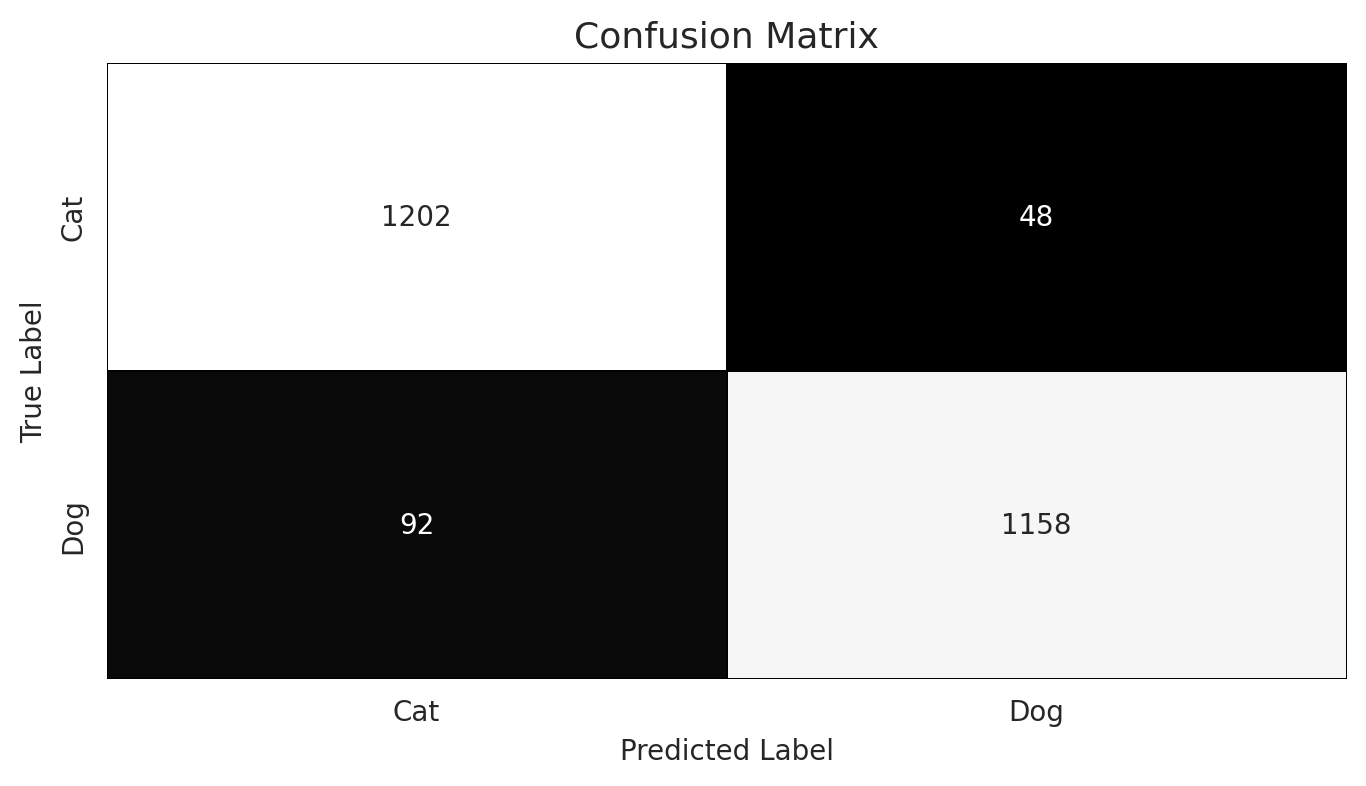

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # Import confusion_matrix


f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

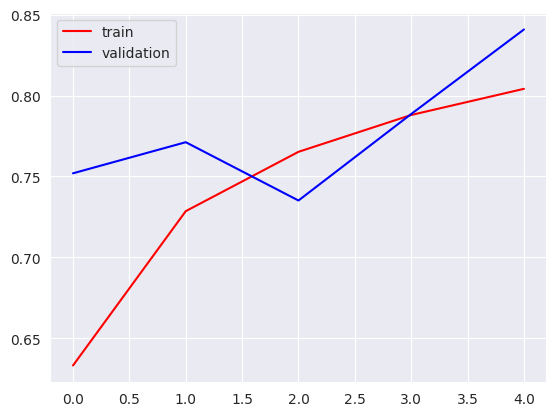

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

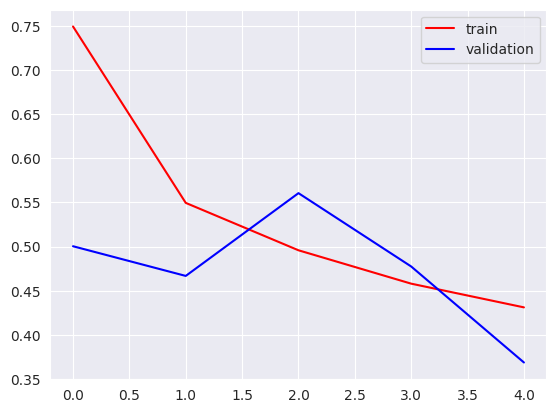

In [ ]:


plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:

from PIL import Image
import numpy as np


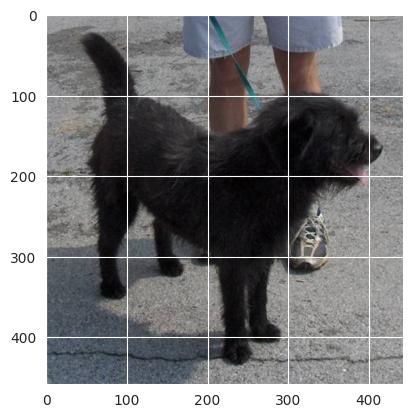

In [ ]:


image_path = "/content/test/test/10025.jpg"
img = Image.open(image_path)

img_array = np.array(img, dtype=np.float32)


plt.imshow(img)